In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn import preprocessing 
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
data = fetch_openml(name='ecoli', version=3)

In [4]:
df = pd.DataFrame(data.frame)
df

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0
...,...,...,...,...,...,...,...,...
322,0.74,0.56,0.48,0.5,0.47,0.68,0.30,7
323,0.71,0.57,0.48,0.5,0.48,0.35,0.32,7
324,0.61,0.60,0.48,0.5,0.44,0.39,0.38,7
325,0.59,0.61,0.48,0.5,0.42,0.42,0.37,7


In [ ]:
X = df.iloc[:,:7]
X

,mcg,gvh,lip,chg,aac,alm1,alm2
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35
...,...,...,...,...,...,...,...
322,0.74,0.56,0.48,0.5,0.47,0.68,0.30
323,0.71,0.57,0.48,0.5,0.48,0.35,0.32
324,0.61,0.60,0.48,0.5,0.44,0.39,0.38
325,0.59,0.61,0.48,0.5,0.42,0.42,0.37


### Метод локтя и не локтя


In [ ]:
from sklearn.metrics import silhouette_score
models = []
score1 = []
score2 = []
for i in range(2,10):
  model = KMeans(n_clusters=i,random_state=123, init='k-means++').fit(X)
  models.append(model)
  score1.append(model.inertia_)
  score2.append(silhouette_score(X, model.labels_))

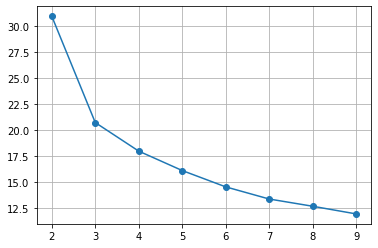

In [ ]:
plt.grid()
plt.plot(np.arange(2,10), score1, marker = 'o')
plt.show()

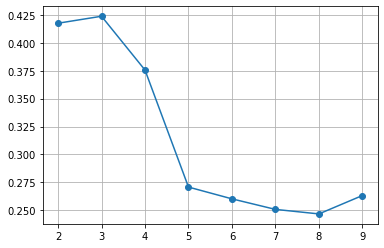

In [ ]:
plt.grid()
plt.plot(np.arange(2,10), score2, marker = 'o')
plt.show()

### K-means

In [ ]:
%%time
model = KMeans(n_clusters=2, random_state=123, init='k-means++').fit(X)

CPU times: user 43.6 ms, sys: 1.97 ms, total: 45.5 ms
Wall time: 29.7 ms


In [ ]:
model.cluster_centers_

array([[0.58561905, 0.48790476, 0.49485714, 0.5       , 0.56180952,
        0.76047619, 0.77047619],
       [0.45094595, 0.50563063, 0.48      , 0.5       , 0.46995495,
        0.37306306, 0.37666667]])

In [ ]:
df['target_kmeans'] = model.labels_
df

,mcg,gvh,lip,chg,aac,alm1,alm2,class,target_kmeans
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0,1
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0,1
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0,1
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0,1
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0,1
...,...,...,...,...,...,...,...,...,...
322,0.74,0.56,0.48,0.5,0.47,0.68,0.30,7,1
323,0.71,0.57,0.48,0.5,0.48,0.35,0.32,7,1
324,0.61,0.60,0.48,0.5,0.44,0.39,0.38,7,1
325,0.59,0.61,0.48,0.5,0.42,0.42,0.37,7,1


In [ ]:
df['target_kmeans'].value_counts()

1    222
0    105
Name: target_kmeans, dtype: int64

In [ ]:
df['class'].value_counts()

0    143
1     77
7     52
4     35
5     20
Name: class, dtype: int64

### Иерархическая агломеративная кластеризация

In [ ]:
%%time
model_aggclust = AgglomerativeClustering(2, compute_distances=True).fit(X)

CPU times: user 7.87 ms, sys: 0 ns, total: 7.87 ms
Wall time: 9.62 ms


In [ ]:
df['target_agg'] = model_aggclust.labels_
df

,mcg,gvh,lip,chg,aac,alm1,alm2,class,target_kmeans,target_agg
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0,1,0
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0,1,0
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0,1,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0,1,0
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0,1,0
...,...,...,...,...,...,...,...,...,...,...
322,0.74,0.56,0.48,0.5,0.47,0.68,0.30,7,1,0
323,0.71,0.57,0.48,0.5,0.48,0.35,0.32,7,1,0
324,0.61,0.60,0.48,0.5,0.44,0.39,0.38,7,1,0
325,0.59,0.61,0.48,0.5,0.42,0.42,0.37,7,1,0


In [ ]:
df['target_agg'].value_counts()

0    223
1    104
Name: target_agg, dtype: int64

### DBSCAN

In [ ]:
%%time
model_DBSCAN = DBSCAN(eps=0.15, 
                      min_samples=6).fit(X)

CPU times: user 8.24 ms, sys: 19 µs, total: 8.26 ms
Wall time: 7.1 ms


In [ ]:
df['target_DBSCAN'] = model_DBSCAN.labels_
df

,mcg,gvh,lip,chg,aac,alm1,alm2,class,target_kmeans,target_agg,target_DBSCAN
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,0,1,0,0
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,0,1,0,0
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,0,1,0,0
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,0,1,0,0
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
322,0.74,0.56,0.48,0.5,0.47,0.68,0.30,7,1,0,-1
323,0.71,0.57,0.48,0.5,0.48,0.35,0.32,7,1,0,0
324,0.61,0.60,0.48,0.5,0.44,0.39,0.38,7,1,0,0
325,0.59,0.61,0.48,0.5,0.42,0.42,0.37,7,1,0,0


In [ ]:
df['target_DBSCAN'].value_counts()

 0    176
 1     87
-1     64
Name: target_DBSCAN, dtype: int64

In [ ]:
df['class'].value_counts()

0    143
1     77
7     52
4     35
5     20
Name: class, dtype: int64

### Визуализация

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'perplexity=20')]

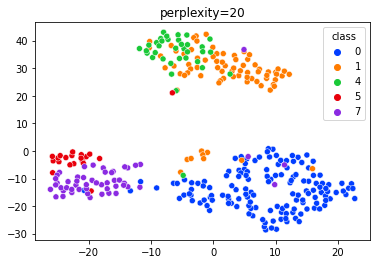

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=20).fit_transform(X)
dataX = X_embedded[:,0]
dataY = X_embedded[:,1]
sns.scatterplot(dataX, dataY, hue=df['class'], palette='bright').set(title='perplexity=20')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'perplexity=20')]

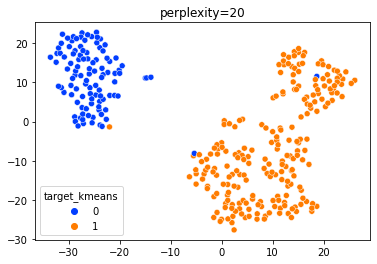

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=20).fit_transform(X)
dataX = X_embedded[:,0]
dataY = X_embedded[:,1]
sns.scatterplot(dataX, dataY, hue=df['target_kmeans'], palette='bright').set(title='perplexity=20')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'perplexity=20')]

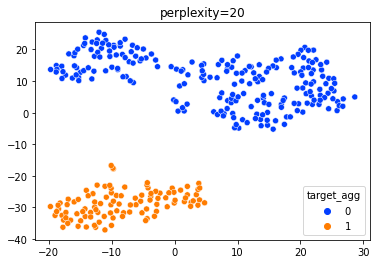

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=20).fit_transform(X)
dataX = X_embedded[:,0]
dataY = X_embedded[:,1]
sns.scatterplot(dataX, dataY, hue=df['target_agg'], palette='bright').set(title='perplexity=20')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'perplexity=20')]

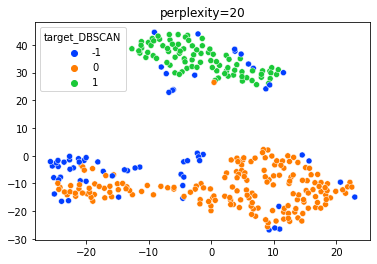

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=20).fit_transform(X)
dataX = X_embedded[:,0]
dataY = X_embedded[:,1]
sns.scatterplot(dataX, dataY, hue=df['target_DBSCAN'], palette='bright').set(title='perplexity=20')